# 보스턴 주택 가격 예측
- 1970년대 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측한다.
- 데이터 포인트가 506개로 개수가 적고 404개는 훈련 샘플, 102개는 테스트 샘플로 나뉘어 있다.
- 입력 데이터에 있는 각 피처는 스케일이 서로 다르다.

In [9]:
import keras

### 보스턴 주택 데이터셋 로드하기
1. 1 인당 범죄율.
2. 25,000 평방 피트 이상의 부지에 대해 구역화 된 주거용 토지의 비율.
3. 도시 당 비 소매 비즈니스 에이커의 비율.
4. Charles River 더미 변수 (지역이 강 경계면 = 1, 그렇지 않으면 0).
5. 산화 질소 농도 (1,000 만분 율).
6. 주거 당 평균 방 수.
7. 1940 년 이전에 지어진 소유주 소유 유닛의 비율.
8. 5 개의 보스턴 고용 센터까지의 가중 거리.
9. 방사형 고속도로에 대한 접근성 색인.
10. $ 10,000 당 전체 가치 재산 세율.
11. 도시 별 학생-교사 비율.
12. 1000 * (Bk-0.63) ** 2 여기서 Bk는 도시 별 흑인 비율입니다.
13. 인구의 낮은 지위 %.

In [10]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [11]:
train_data.shape

(404, 13)

In [12]:
test_data.shape

(102, 13)

- 404개의 훈련 샘플과 102개의 테스트 샘플이 있고 13개의 수치형 피처가 있다.

In [13]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

- 타깃은 주택의 중간 가격으로 천 달러 단위이다.
- 가격은 일반적으로 1만 달러에서 5만 달러 사이이다.

### 데이터 정규화하기
- 스케일이 다른 피처를 신경망에 주입하면 전역 최소 점을 찾아가는 경사 하강법의 경로가 스케일이 큰 특성에 영향을 많이 받기 때문에 학습을 어렵게 한다.
- 입력 데이터를 표준화(standardization)한다 즉, 입력 데이터에 있는 각 피처에 대해 피처의 평균을 빼고 표준 편차로 나눈다.
- 피처의 중앙이 0 근처에 맞춰지고 표준 편차는 1이 된다.

In [14]:
# 표준화 : 각 피쳐에 대해 피쳐의 평균을 빼고, 표준 편차로 나눈다.

mean = train_data.mean(axis=0) # 행을 기준으로
train_data -= mean
std = train_data.std(axis=0) # 표준 편차
train_data /= std

# test_data도 똑같이 (훈련 데이터에서 계산한 값을 사용해야 함.)
test_data -= mean
test_data /= std

- 테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값이다.
- 머신 러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안 된다.
- 마찬가지로 실전에 투입하여 새로운 데이터에 대한 예측을 만들 때도 훈련 데이터에서 계산한 값을 사용하여 정규화해야 한다.

### 모델 정의하기
- 샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용한다.
- 일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용한다.

In [15]:
from keras import models, layers

def build_model():
    model = models.Sequential() # 네트워크 하나 생성
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) # 은닉 층 2개
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # 출력 값 하나 반환
    
    # optimizer : 경사하강법
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

- 이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없다.(선형 층)
- 활성화 함수를 적용하면 출력 값의 범위를 제한하게 되기 때문이다.
- 마지막 층이 순수한 선형이므로 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습된다.
- 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성이다.
- 평균 제곱 오차(mse)를 손실 함수로 사용한다.
- 평균 절대 오차(mae)를 모니터링을 위한 성능 평가 지표로 사용한다.

### K-겹 검증하기
- 하이퍼 파라미터를 튜닝하면서 모델을 평가하기 위해 데이터를 훈련 세트와 검증 세트로 나눈다.
- 데이터 포인트가 많지 않기 때문에 검증 세트가 매우 작아지고 어떤 데이터 포인트가 훈련 세트와 검증 세트로 선택되었는지에 따라 점수가 크게 달라진다.
- 검증 세트의 분할에 대한 검증 점수의 분산이 높으면 신뢰 있는 모델 평가를 할 수 없다.
- 따라서 K-겹 교차 검증을 사용한다.
- 모델의 검증 점수는 K개의 검증 점수 평균이 된다.

In [17]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('처리 중인 폴드 #', i)
    
    # 검증 데이터 준비 : k번째 분할
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples] # 슬라이싱
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    # 훈련 데이터 준비
    partial_train_data = np.concatenate( # 하나로 합쳐주는 함수
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0
    )
    partial_trian_targets = np.concatenate(
        [train_data[:i*num_val_samples], 
         train_data[(i+1)*num_val_samples:]],
        axis=0
    )
    
    # 케라스 모델 구성
    model = build_model()
    
    # 모델 훈련
    model.fit(partial_train_data, partial_trian_targets, 
              epochs=num_epochs, batch_size=1, verbose=0)
    
    #모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

처리 중인 폴드 # 0
처리 중인 폴드 # 1
처리 중인 폴드 # 2
처리 중인 폴드 # 3
[21.83719253540039, 22.04921531677246, 21.374540328979492, 24.319307327270508]
22.395063877105713


- num_epochs=100으로 실행했다.
- 검증 점수가 2.0에서 3.0까지 변화가 크다.
- 평균값(2.6)이 각각의 점수보다 훨씬 신뢰할 만하다.
- 평균적으로 2,600달러 정도 차이가 난다.
- 주택 가격의 범위가 10,000달러에서 50,000달러 사이인 것을 감안하면 비교적 큰 값이다.

### 각 폴드에서 검증 점수를 로그에 저장하기
- 신경망을 조금 더 오래 500 에포크 동안 훈련한다.
- 각 에포크마다 모델이 얼마나 개선되는지 기록하기 위해 훈련 루프를 수정하여 에포크의 검증 점수를 로그에 저장한다.

In [18]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']  # 매 에포크마다 검증 평균 절대 오차
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


### K-겹 검증 점수 평균 기록하기

In [19]:
all_mae_histories

[[3.828648090362549,
  3.063049554824829,
  2.8248393535614014,
  2.5479464530944824,
  2.4749114513397217,
  2.917386293411255,
  2.363158941268921,
  2.5972678661346436,
  2.4617271423339844,
  2.2438652515411377,
  2.332885980606079,
  2.175752639770508,
  2.107304573059082,
  2.0690784454345703,
  2.1173300743103027,
  1.9983253479003906,
  2.054776430130005,
  1.8428473472595215,
  2.175063133239746,
  1.8670796155929565,
  2.1482701301574707,
  1.8925034999847412,
  2.045454502105713,
  1.9286237955093384,
  1.9077650308609009,
  1.8566495180130005,
  1.8917738199234009,
  1.9183342456817627,
  1.9612458944320679,
  1.8001471757888794,
  2.073514223098755,
  1.9385645389556885,
  2.125901699066162,
  1.7650362253189087,
  2.0131826400756836,
  2.4177651405334473,
  1.9222733974456787,
  1.7676644325256348,
  2.0168118476867676,
  1.7150352001190186,
  2.1152732372283936,
  2.252931594848633,
  1.8085094690322876,
  2.315540075302124,
  1.8322182893753052,
  2.38382625579834,
  2.

In [22]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [23]:
average_mae_history

[4.28903591632843,
 3.365283191204071,
 2.969073176383972,
 2.751811385154724,
 2.6945231556892395,
 2.8459916710853577,
 2.7308982610702515,
 2.682870864868164,
 2.7320058345794678,
 2.576486349105835,
 2.6325740218162537,
 2.6025431752204895,
 2.5110697746276855,
 2.489963471889496,
 2.5009554624557495,
 2.4009350538253784,
 2.556409180164337,
 2.331529915332794,
 2.501775801181793,
 2.5047651827335358,
 2.4933048486709595,
 2.420327663421631,
 2.3518126010894775,
 2.4174327552318573,
 2.32931587100029,
 2.5236028730869293,
 2.3553626239299774,
 2.2628581523895264,
 2.428886502981186,
 2.2577447593212128,
 2.358552575111389,
 2.323050320148468,
 2.4315772652626038,
 2.356330007314682,
 2.321038603782654,
 2.4769463539123535,
 2.3526678681373596,
 2.3290754556655884,
 2.3795665502548218,
 2.2227579951286316,
 2.3293774127960205,
 2.422655165195465,
 2.338980048894882,
 2.4878954887390137,
 2.3050023019313812,
 2.4118966460227966,
 2.4352992177009583,
 2.2400518357753754,
 2.4145897030

### 검증 점수 그래프

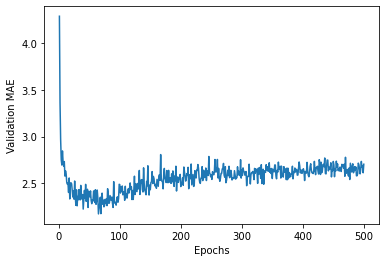

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

### 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
- 곡선의 다른 부분과 스케일이 많이 다른 첫 10개의 데이터 포인트를 제외시킨다.
- 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체한다.
- 지수 이동 평균은 시계열 데이터를 부드럽게 만드는 기법 중 하나로 이전에 계산된 이동 평균에 factor를 곱하고 현재 포인트에 (1-factor)를 곱해 합산한 것이다.

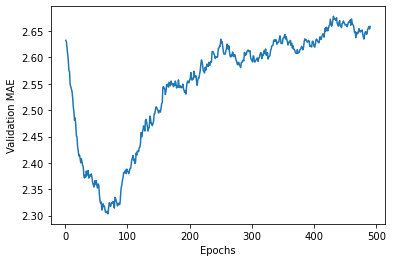

In [28]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 검증 MAE가 60번째 에포크 이후에 줄어드는 것이 멈췄다.
- 이 지점 이후로 과대적합이 시작된다.

### 최종 모델 훈련하기

In [29]:
model = build_model()
model.fit(train_data, train_targets,
         epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 5ms/step - loss: 21.0634 - mae: 2.9058
2.905751943588257
